<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre4/CTR1_Exercice3_8_version_levenspiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3.8

## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# l'intégrateur
from scipy.integrate import quad

## Définir les constantes du problème

In [0]:
k = 10 # L2/mol2/s
Vdot = 4 # mol/s

R = 0.082057338 # L*atm/K/mol
P = 16.4 # atm
T = 500 # K

CT = P/R/T

xA0 = 0.5 # -
xB0 = 0.5 # -
xC0 = 0 # -


CA0 = xA0 * CT # mol/L
CB0 = xB0 * CT  # mol/L
CC0 = xC0 * CT  # mol/L

FA0 = Vdot * CA0 # mol/s
FB0 = Vdot * CB0 # mol/s
FC0 = Vdot * CC0 # mol/s

epsilon = -0.5


In [0]:
def r(X):
    CA = CA0 * (1-X) / (1+epsilon*X)
    CB = CA0 * (CB0/CA0-0.5*X) / (1+epsilon*X)
    return k * CA**2 * CB

In [0]:
def levenspiel(X):
    FA0 = CA0 * Vdot
    return FA0 / 2 / r(X)
    

In [0]:
Xs = np.arange(0, 0.9, 0.01)
Ys = levenspiel(Xs)

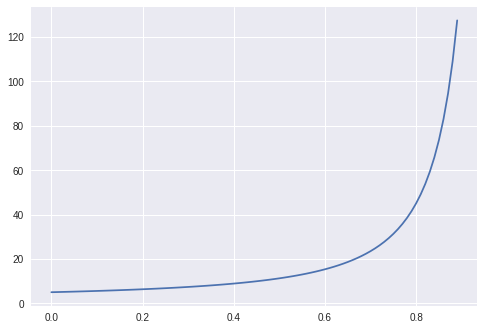

In [6]:
plt.plot(Xs, Ys)
plt.show()

In [7]:
V_CSTR_08 = levenspiel(0.8) * (0.8 - 0)
V_CSTR_08

36.05036316288891

In [8]:
V_PFR_08 = quad(levenspiel, 0, 0.8)[0]
V_PFR_08

10.037617557104475

In [9]:
V_CSTR_099 = levenspiel(0.99) * (0.99 - 0)
V_CSTR_099

12641.397815221611

In [10]:
V_PFR_099 = quad(levenspiel, 0, 0.99)[0]
V_PFR_099

136.69138638613944